In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

데이터준비
다중분류 7가지 생선중에 뭘까

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [4]:
#diagonal - 대각선

pd.unique(fish['Species']) # or fish.Species

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [11]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [12]:
fish_input[:5] #5개만

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [13]:
fish_target = fish['Species'].to_numpy()
fish_target[154:]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)



In [15]:
print(train_input.shape, test_input.shape)

(119, 5) (40, 5)


#### 단위값을 표준화

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [19]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [20]:
train_scaled[:20]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ],
       [-0.9127463 , -0.96490079, -0.95281644, -0.88017186, -0.99153566],
       [-0.79734143, -0.70251203, -0.76172762, -0.78282455, -0.54453018],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [-0.74104638, -0.67439895, -0.73567006, -0.61205928, -0.55733138],
       [-0.86771025, -0.7962223 , -0.89201546, -0.93358694, -1.02183182],
       [ 0.82114147,  0.74999715,  0.67143852,  0.4984706 ,  1.47257213],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.33981873,  0.40326915,  0.23714575,  0.28831696,  0.95686692],
       [-0.54401367, -0.51509149, -0.4

k-최근접 이웃 알고리즘 분류

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)


KNeighborsClassifier(n_neighbors=3)

In [23]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [24]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [25]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [26]:
test_input[:5]

array([[ 78.    ,  18.7   ,  19.4   ,   5.1992,   3.1234],
       [ 13.4   ,  12.4   ,  13.5   ,   2.43  ,   1.269 ],
       [200.    ,  32.3   ,  34.8   ,   5.568 ,   3.3756],
       [270.    ,  26.    ,  28.7   ,   8.3804,   4.2476],
       [150.    ,  23.    ,  24.5   ,   5.2185,   3.626 ]])

In [27]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [28]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [32]:
from unicodedata import decimal

print(kn.classes_)
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # decimal = 소수점 몇자리까지 표기한다는 뜻

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


### 로지스틱 회귀

In [34]:
z = np.arange(-5, 5, 0.1)

Text(0.5, 0, 'z')

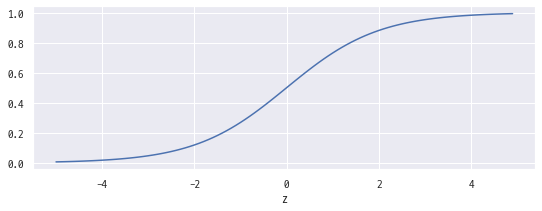

In [35]:
phi = 1 / (1+np.exp(-z))
plt.figure(figsize=(9,3))
plt.plot(z,phi)
plt.xlabel('z')

로지스틱 이진분류

이거 하려면 둘 만 있어야 하니까.

In [36]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

In [37]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [38]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt.shape, target_bream_smelt.shape)

(33, 5) (33,)


In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [40]:
lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [41]:
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [43]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [44]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [45]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [46]:
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))